Reading classics [Python Machine Learning 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch15/ch15_part1.ipynb)

In [1]:
from IPython.display import display,HTML
import random
c1,c2,f1,f2,fs1,fs2=\
'#11ff66','#6611ff','Lobster','Orbitron',30,10
def bhtml(string,font_color=c1,font_family=f1,font_size=fs1):
    randi=random.randint(1,999999999)
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""+\
    font_family+"""';</style><h1 id='colored_font"""+str(randi)+\
    """' style='text-shadow:3px 3px 3px #11dd33; font-family:"""+\
    font_family+"""; color:"""+font_color+"""; font-size:"""+\
    str(font_size)+"""px; text-align:center; """+\
    """height:"""+str(1.5*font_size)+"""px'>%s</h1>"""%string+\
    """<script>var idc=setInterval(function() {"""+\
    """var iddoc=document.getElementById("""+\
    """'colored_font"""+str(randi)+"""'); """+\
    """var now=new Date().getTime(); """+\
    """var sec=Math.floor((now%(1000*60))/1000); """+\
    """var col='rgb(0,'+(255-Math.abs(245-8*sec))+','"""+\
    """+(10+Math.abs(245-8*sec))+')'; """+\
    """iddoc.style.background=col;},100);</"""+"""script>"""))
def df_with_styling(arg,index):
    return display(pd.DataFrame(arg,index)\
        .style.background_gradient(cmap='GnBu',axis=1)\
        .set_properties(**{'max-width':'50px','height':'50px'}))

In [2]:
bhtml('Code Modules, Setting, & Functions')

In [3]:
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf,pylab as pl
import pandas as pd,numpy as np
import scipy.signal as sps
import skimage.measure as sim
import tensorflow.keras.layers as tkl
import tensorflow.keras.utils as tku
from IPython.core.magic import register_line_magic
pd.set_option('precision',3)

In [4]:
bhtml('Conv1d Exploration')

In [5]:
num_w,num_x=4,7 #num_w>3!
w=np.random.random(num_w)
x=np.random.random(num_x)
w_rotated=np.array(w[::-1])
df_with_styling([w,w_rotated],index=['w','w_rotated'])

,0,1,2,3
w,0.665,0.983,0.468,0.927
w_rotated,0.927,0.468,0.983,0.665


In [6]:
def conv_step(x,i):
    y=np.dot(x[i:i+len(w)],w_rotated)
    display(
        pd.DataFrame([x,i*[np.nan]+list(w_rotated),
                      i*[np.nan]+[y]],
                     index=['x','w_rotated','y'])\
        .style.bar(align='mid',color=c1,
                   subset=list(range(i,i+len(w))))\
        .set_properties(**{'max-width':'50px'}))  
for i in range(len(x)-len(w)+1): conv_step(x,i)

,0,1,2,3,4,5,6
x,0.351,0.185,0.496,0.621,0.766,0.253,0.948
w_rotated,0.927,0.468,0.983,0.665,nan,nan,nan
y,1.313,nan,nan,nan,nan,nan,nan


,0,1,2,3,4,5,6
x,0.351,0.185,0.496,0.621,0.766,0.253,0.948
w_rotated,nan,0.927,0.468,0.983,0.665,nan,nan
y,nan,1.524,nan,nan,nan,nan,nan


,0,1,2,3,4,5,6
x,0.351,0.185,0.496,0.621,0.766,0.253,0.948
w_rotated,nan,nan,0.927,0.468,0.983,0.665,nan
y,nan,nan,1.672,nan,nan,nan,nan


,0,1,2,3,4,5,6
x,0.351,0.185,0.496,0.621,0.766,0.253,0.948
w_rotated,nan,nan,nan,0.927,0.468,0.983,0.665
y,nan,nan,nan,1.813,nan,nan,nan


In [7]:
def conv1d(x,w,p,s):
    w_rotated=np.array(w[::-1])
    x_padded=np.array(x)
    w_length=w_rotated.shape[0]
    x_length=x_padded.shape[0]+p*2
    if p>0:
        zero_pad=np.zeros(shape=p)
        x_padded=np.concatenate([zero_pad,x_padded,zero_pad])
    df_with_styling([x,x_padded,w,w_rotated],
                    index=['x','padded x','w','rotated w'])
    result=[]; steps=int((x_length-w_length)/s)+w_length%2
    for i in range(0,steps,s):
        result.append(np.sum(x_padded[i:i+w_length]*w_rotated))
    return np.array(result)
df_with_styling([conv1d(x,w,p=2,s=1),
                 np.convolve(x,w,mode='same')],
                index=['conv1d','numpy convolve'])

,0,1,2,3,4,5,6,7,8,9,10
x,0.351,0.185,0.496,0.621,0.766,0.253,0.948,nan,nan,nan,nan
padded x,0.000,0.000,0.351,0.185,0.496,0.621,0.766,0.253,0.948,0.000,0.000
w,0.665,0.983,0.468,0.927,nan,nan,nan,nan,nan,nan,nan
rotated w,0.927,0.468,0.983,0.665,nan,nan,nan,nan,nan,nan,nan


,0,1,2,3,4,5,6
conv1d,0.469,0.677,1.313,1.524,1.672,1.813,1.760
numpy convolve,0.469,0.677,1.313,1.524,1.672,1.813,1.760


In [8]:
df_with_styling([x,w]+[np.convolve(x,w,mode=m) 
                for m in ['full','same','valid']],
                index=range(5))

,0,1,2,3,4,5,6,7,8,9
0,0.351,0.185,0.496,0.621,0.766,0.253,0.948,nan,nan,nan
1,0.665,0.983,0.468,0.927,nan,nan,nan,nan,nan,nan
2,0.233,0.469,0.677,1.313,1.524,1.672,1.813,1.760,0.678,0.879
3,0.469,0.677,1.313,1.524,1.672,1.813,1.760,nan,nan,nan
4,1.313,1.524,1.672,1.813,nan,nan,nan,nan,nan,nan


In [9]:
bhtml('Conv2d Exploration')

In [10]:
num_X=6; p=[1,1]
X=np.random.random([num_X,num_X])
n1=X.shape[0]+2*p[0]
n2=X.shape[1]+2*p[1]
X_padded=np.zeros(shape=(n1,n2))
X_padded[p[0]:p[0]+X.shape[0],
         p[1]:p[1]+X.shape[1]]=X
df_with_styling(X_padded,index=range(num_X+2))

,0,1,2,3,4,5,6,7
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.003,0.752,0.905,0.413,0.305,0.619,0.000
2,0.000,0.301,0.239,0.503,0.172,0.922,0.115,0.000
3,0.000,0.932,0.805,0.861,0.563,0.483,0.450,0.000
4,0.000,0.292,0.251,0.849,0.420,0.075,0.273,0.000
5,0.000,0.492,0.494,0.396,0.443,0.651,0.375,0.000
6,0.000,0.430,0.432,0.185,0.798,0.511,0.283,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [11]:
num_W=3
W=np.random.random([num_W,num_W])
W_rotated=np.array(W)[::-1,::-1]
for m in [W,W_rotated]:
    df_with_styling(m,index=range(num_W)) 

,0,1,2
0,0.692,0.111,0.722
1,0.158,0.906,0.390
2,0.545,0.823,0.966


,0,1,2
0,0.966,0.823,0.545
1,0.390,0.906,0.158
2,0.722,0.111,0.692


In [12]:
X0=X_padded[:num_W,:num_W]
Y0=round(np.sum(X0*W_rotated),9)
for m in [X0,W_rotated]:
    df_with_styling(m,index=range(num_W))
bhtml(7*'&#x21e3;'); bhtml(str(Y0))

,0,1,2
0,0.000,0.000,0.000
1,0.000,0.003,0.752
2,0.000,0.301,0.239


,0,1,2
0,0.966,0.823,0.545
1,0.390,0.906,0.158
2,0.722,0.111,0.692


In [13]:
def conv2d(X,W,p,s):
    W_rotated=np.array(W)[::-1,::-1]
    n1=X.shape[0]+2*p[0]
    n2=X.shape[1]+2*p[1]
    X_padded=np.zeros(shape=(n1,n2))
    X_padded[p[0]:p[0]+X.shape[0],
    p[1]:p[1]+X.shape[1]]=X
    result=[]
    l=(int((X_padded.shape[0]-W_rotated.shape[0])/s[0])+1,
       int((X_padded.shape[1]-W_rotated.shape[1])/s[1])+1)
    for i in range(0,l[0],s[0]):
        result.append([])
        for j in range(0,l[1],s[1]):
            X_sub=X_padded[i:i+W_rotated.shape[0],
                           j:j+W_rotated.shape[1]]
            result[-1].append(np.sum(X_sub*W_rotated))
    return(np.array(result))

In [14]:
for el in [conv2d(X,W,p=(1,1),s=(1,1)),
           sps.convolve2d(X,W,mode='same')]:
    df_with_styling(el,index=range(6))

,0,1,2,3,4,5
0,0.321,1.417,1.525,1.796,0.841,1.358
1,1.384,2.887,3.339,2.896,2.679,1.666
2,1.555,2.816,2.487,2.762,2.215,1.665
3,1.906,3.191,3.433,3.067,2.112,1.625
4,1.247,2.139,2.676,2.440,2.267,1.291
5,1.132,1.686,1.506,1.977,1.987,1.394


,0,1,2,3,4,5
0,0.321,1.417,1.525,1.796,0.841,1.358
1,1.384,2.887,3.339,2.896,2.679,1.666
2,1.555,2.816,2.487,2.762,2.215,1.665
3,1.906,3.191,3.433,3.067,2.112,1.625
4,1.247,2.139,2.676,2.440,2.267,1.291
5,1.132,1.686,1.506,1.977,1.987,1.394


In [15]:
bhtml('Pooling Exploration')

In [16]:
pool_size=3
for [i,j] in [[0,0],[0,1],[1,0],[1,1]]:
    display(pd.DataFrame(
        X[i*pool_size:(i+1)*pool_size,
          j*pool_size:(j+1)*pool_size])\
        .style.highlight_max(color=c1,axis=None)\
        .set_properties(
            **{'max-width':'50px','height':'50px'}))

,0,1,2
0,0.003,0.752,0.905
1,0.301,0.239,0.503
2,0.932,0.805,0.861


,0,1,2
0,0.413,0.305,0.619
1,0.172,0.922,0.115
2,0.563,0.483,0.450


,0,1,2
0,0.292,0.251,0.849
1,0.492,0.494,0.396
2,0.430,0.432,0.185


,0,1,2
0,0.420,0.075,0.273
1,0.443,0.651,0.375
2,0.798,0.511,0.283


In [17]:
maxp=sim.block_reduce(X,(pool_size,pool_size),np.max)
pd.DataFrame(maxp).style.bar(align='mid',color=c1)\
.set_properties(**{'max-width':'50px','height':'50px'})

,0,1
0,0.932,0.922
1,0.849,0.798


In [18]:
meanp=sim.block_reduce(X,(pool_size,pool_size),np.mean)
pd.DataFrame(meanp).style.bar(align='mid',color=c1)\
.set_properties(**{'max-width':'50px','height':'50px'})

,0,1
0,0.589,0.449
1,0.425,0.426


In [19]:
bhtml('Keras Conv1D/MaxPool1D & Conv2D/MaxPool2D')

In [20]:
%%writefile keras_model_plot12d.py
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow.keras.layers as tkl
import tensorflow.keras.utils as tku
from IPython.core.magic import register_line_magic
from IPython.display import display

@register_line_magic
def get_model_plot1d(pars):
    pars=pars.split()
    num_timesteps=int(pars[0])
    num_features=int(pars[1])
    num_filters=int(pars[2])
    ks=int(pars[3])
    ps=int(pars[4])
    model=tf.keras.Sequential()
    model.add(tkl.InputLayer((num_timesteps,
                              num_features),
                             name='input'))
    model.add(tkl.Conv1D(
        filters=num_filters,
        kernel_size=ks,
        padding='same',name='conv1d',
        activation='relu'))
    model.add(tkl.MaxPool1D(
        pool_size=ps,name='pool1d'))
    display(tku.plot_model(model,show_shapes=True))

@register_line_magic
def get_model_plot2d(pars):
    pars=pars.split()
    img_size=int(pars[0])
    num_channels=int(pars[1])
    num_filters=int(pars[2])
    ks=int(pars[3])
    ps=int(pars[4])
    model=tf.keras.Sequential()
    model.add(tkl.InputLayer((img_size,img_size,
                              num_channels),
                             name='input'))
    model.add(tkl.Conv2D(
        filters=num_filters,
        kernel_size=(ks,ks),strides=(1,1),
        padding='same',name='conv2d',
        activation='relu'))
    model.add(tkl.MaxPool2D(
        pool_size=(ps,ps),name='pool2d'))
    display(tku.plot_model(model,show_shapes=True))

Writing keras_model_plot12d.py


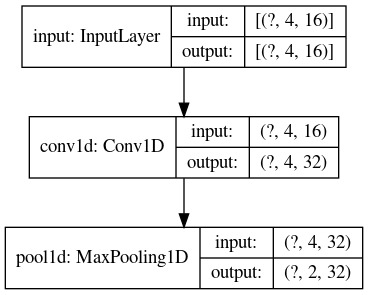

In [21]:
%run keras_model_plot12d.py
%get_model_plot1d 4 16 32 3 2

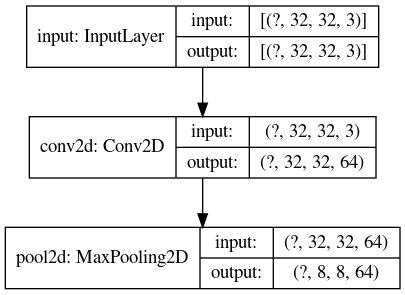

In [22]:
%get_model_plot2d 32 3 64 5 4

In [23]:
bhtml('Keras Dropout')

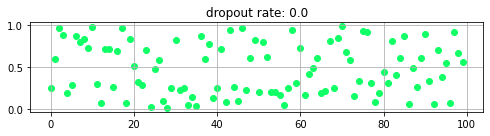

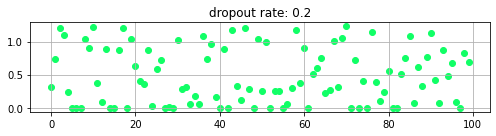

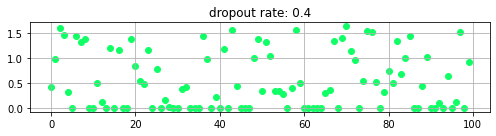

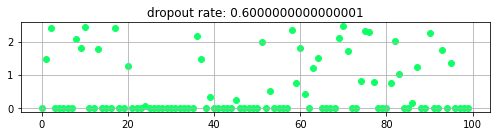

In [24]:
num_Y=100; dr=[.2*i for i in range(4)]
Y=np.random.random(num_Y)
for i in range(4):
    pl.figure(figsize=(7,2))
    pl.scatter(range(num_Y),
               tkl.Dropout(rate=dr[i])\
               (Y,training=True),c=c1)
    pl.title('dropout rate: '+str(dr[i]))
    pl.grid(); pl.tight_layout(); pl.show()